            population  citizens  registered     voted
population    1.000000  0.998293    0.993263  0.992711
citizens      0.998293  1.000000    0.997778  0.996752
registered    0.993263  0.997778    1.000000  0.998946
voted         0.992711  0.996752    0.998946  1.000000


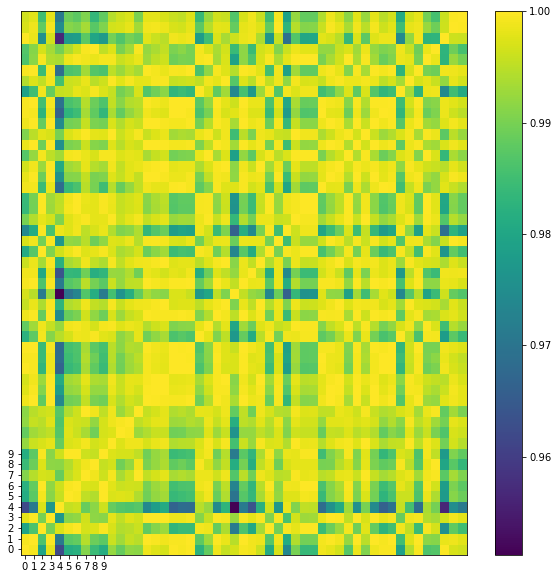

In [2]:
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt

df = pd.read_csv("registration.csv")
del df['state'] 


print(df.corr())


fig = plt.gcf()
fig.set_size_inches(10, 10)


R = corrcoef(df)
pcolor(R)
colorbar()
yticks(arange(0.5,10.5),range(0,10))
xticks(arange(0.5,10.5),range(0,10))
show()

In [3]:
import numpy as np
import statsmodels.formula.api as sm

model = sm.ols(formula='voted ~ registered', data=df)
fitted = model.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  voted   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.322e+04
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           3.02e-67
Time:                        15:30:32   Log-Likelihood:                -318.77
No. Observations:                  51   AIC:                             641.5
Df Residuals:                      49   BIC:                             645.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1690     25.202     -0.165      0.8

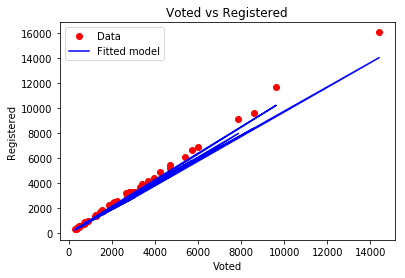

In [4]:
plt.plot(df['voted'], df['registered'], 'ro')
plt.plot(df['voted'], fitted.fittedvalues, 'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('Voted')
plt.ylabel('Registered')
plt.title('Voted vs Registered')
plt.show()